# COGS 108 - EDA Checkpoint

# Names

- Alan Tsui
- Edmond Choi
- Keith Ho
- Kelly Kong
- Nari Kim

<a id='research_question'></a>
# Research Question

_What's the effects of a pandemic on the US economy?_
1. Effects of the SARS pandemic on the US economy?
2. Effects of the H1N1 pandemic on the US economy?
3. Effects of the COVID pandemic on the US economy?

# Setup

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)
style.use('fivethirtyeight')
#plt.xkcd()

# import pandas & numpy library
import pandas as pd
import numpy as np

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import scipy.stats as stats
from scipy.stats import normaltest

import datetime as dt

# Data Cleaning

We did not include data cleaning steps for datasets that were already previously cleaned in the data checkpoint.ipynb. 

First we found individual datasets for each pharmaceutical company’s stock, so we added columns for their appropriate names and symbols in order to concatenate all of the csv files. Since the stock data were all split into 10 different files, we ran a simple python script that dropped all the columns that we do not need, such as ‘High’, ‘Low’, ‘Open’, ‘Close’ prices, as we decided to use the Adjusted Close daily price as our determining factor. Since the data we downloaded from Kaggle only went up to April 1st 2020, and with COVID-19 still happening, we concatenated the data we have now with updated data we were able to download from Yahoo-Finance API. With that our data now contains the stock price of each individual company from when they went public on the stock market to February 23 2021. With that we combined all ten different dataset into one, with an added column that signifies which stock each data point is referring to. We then changed the date column which was originally a string type, into date-time so we can more easily grab the date ranges for each pandemic. Lastly, we narrowed down our dataset by selecting the necessary columns we needed to answer our research question.

We also found a Dow Jones dataset, which we cleaned with the same python script as described above.


The python script is uploaded to this github under ./stocks_data/CleanStocks.py.



In [2]:
#we decided to drop the depression dataset
depression = pd.read_csv('./data/share-with-depression.csv')
dCols = ['Country', 'Year', 'Percent']
depression.columns = dCols


############################
# SARS DATA SECTION
############################
sars_data = pd.read_csv('./data/sars_summary.csv')
sCols = ['Date', 'Country', 'Total Cases', 'Total Deaths']
sars_data.columns = sCols
sars_data['Date'] = pd.to_datetime(sars_data['Date'])
sars_data = sars_data[sars_data["Country"] == 'United States']
sars_data.head()

# filter pharmaceutical company stocks in relation to time period of H1N1
sarsPharmStocks = pd.read_csv('./stocks_data/pharmstocks.csv')
sarsPharmStocks['Date'] = pd.to_datetime(sarsPharmStocks['Date'])
sarsPharmStocks = sarsPharmStocks[(sarsPharmStocks["Date"] >= '2003-01-02') & (sarsPharmStocks['Date'] <= '2003-09-01')]
sarsPharmStocks['Pct Change'] = sarsPharmStocks['Price'].pct_change()
sarsPharmStocks.head()

# filter Dow Jones Index in relation to time period of SARS
sarsDJI = pd.read_csv('./stocks_data/DJI.csv')
sarsDJI['Date'] = pd.to_datetime(sarsDJI['Date'])
sarsDJI = sarsDJI[(sarsDJI['Date'] >= '2003-01-02') & (sarsDJI['Date'] <= '2003-09-01')]
sarsDJI['Pct Change'] = sarsDJI['Price'].pct_change()
sarsDJI.head()


##############################
# H1N1 DATA SECTION
##############################
h1n1 = pd.read_csv('./data/h1n1_summary.csv')
hCols = ['Date', 'Country', 'Total Cases', 'Total Deaths']
h1n1.columns = hCols
h1n1US = h1n1[h1n1['Country'] == 'United States of America'].reset_index()
h1n1US = h1n1US.drop(['index'], axis=1)
h1n1US['Date'] = pd.to_datetime(h1n1US['Date'], format = '%Y-%m-%d')

# filter our pharmaceutical company stocks in relation to time period of H1N1
h1n1PharmStocks = pd.read_csv('./stocks_data/top_pharm.csv')
pCols = ['Index','Symbol','Company','Date','Open', 'High', 'Low', 'Close', 'Adj Close Price', 'Volume']
h1n1PharmStocks.columns = pCols
h1n1PharmStocks['Date'] = pd.to_datetime(h1n1PharmStocks['Date'])
h1n1PharmStocks = h1n1PharmStocks[(h1n1PharmStocks['Date'] >= '2009-03-02') & (h1n1PharmStocks['Date'] <= '2009-08-06')]
h1n1PharmStocks['Pct Change'] = h1n1PharmStocks['Adj Close Price'].pct_change()
h1n1PharmStocks.head()

# filter Dow Jones Index in relation to time period of H1N1
h1n1DJI = pd.read_csv('./stocks_data/DJI.csv')
h1n1DJI['Date'] = pd.to_datetime(h1n1DJI['Date'])
h1n1DJI = h1n1DJI[(h1n1DJI['Date'] >= '2009-03-02') & (h1n1DJI['Date'] <= '2009-08-06')]
h1n1DJI['Pct Change'] = h1n1DJI['Price'].pct_change()
h1n1DJI.head()


############################
# COVID DATA SECTION
############################
covid = pd.read_csv('./data/covid.csv')
covid = covid.drop(covid.columns[0], axis=1)
cols_covid = ['Continent', 'Country', 'Date', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']
covid.columns = cols_covid
covid['Date'] = pd.to_datetime(covid['Date'])
covid = covid[covid["Country"] == 'United States']
covid.head()

# filter our pharmaceutical company stocks in relation to time period of COVID
covidPharmStocks = pd.read_csv('./stocks_data/pharmstocks.csv')
covidPharmStocks['Date'] = pd.to_datetime(covidPharmStocks['Date'])
covidPharmStocks = covidPharmStocks[covidPharmStocks["Date"] >= '2019-12-15']
covidPharmStocks['Pct Change'] = covidPharmStocks['Price'].pct_change()
covidPharmStocks.head()

# filter Dow Jones Index in relation to time period of COVID
covidDow = pd.read_csv('./stocks_data/^DJI.csv')
covidDow['Date'] = pd.to_datetime(covidDow['Date'])
covidDow = covidDow[covidDow["Date"] >= '2019-12-15']
covidDow['Pct Change'] = covidDow['Price'].pct_change()
covidDow.head()


,Date,Price,Pct Change
7042,2019-12-16,28235.890625,NaN
7043,2019-12-17,28267.160156,0.001107
7044,2019-12-18,28239.279297,-0.000986
7045,2019-12-19,28376.960938,0.004876
7046,2019-12-20,28455.089844,0.002753


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

### Carrying out EDA for SARS and stock prices relationship

To reduce noise in our data, we decided to take the average among all 10 of the pharmaceutical companies in the top_pharm.csv dataset to simplify and better visualize the pattern between the stock market trends and pandemic cases. We also plotted data of stock prices 2 months before and 2 months after each pandemic to show the market before and after the pandemic. This allows us to better understand the trends of the stock market and how the pandemic affected it.

##### Pharmaceutical Company stock prices compared to SARS pandemic

Text(0.5, 1.0, 'Pharmacy Stock Prices vs. SARS Cases')

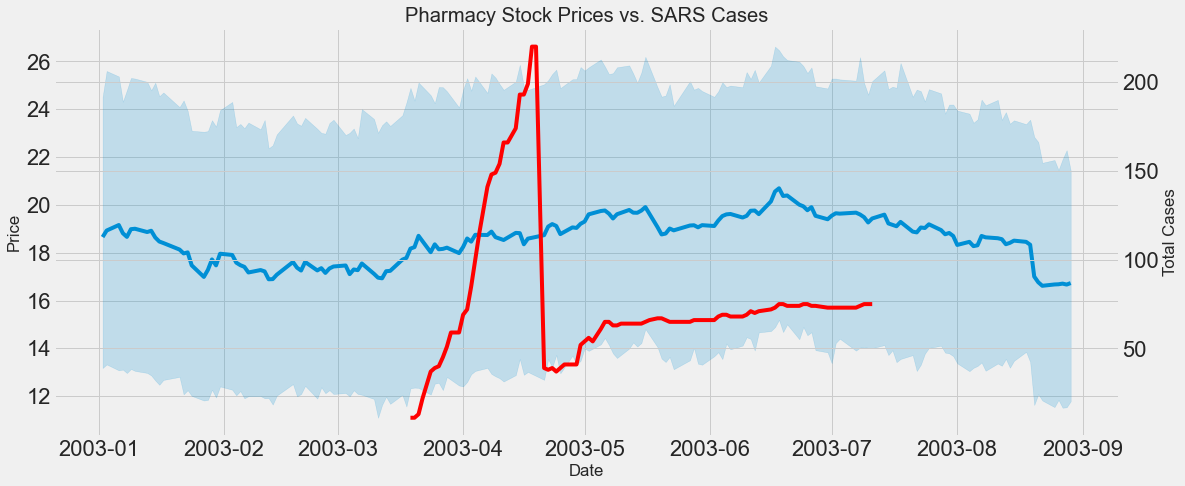

In [3]:
# general trend of pharmacy stocks prices plotted along with the general trend of sars cases
ax = sns.lineplot(x="Date", y="Price", data=sarsPharmStocks)
sns.lineplot(data = sars_data, x = 'Date', y='Total Cases', ax=ax.twinx(),color='red').set_title('Pharmacy Stock Prices vs. SARS Cases')

This graph compares the cumulative SARS cases with the top pharmaceutical company stock prices. Aside from the sudden drop in SARS cases between March 2003 to April 2003, which we acknowledged must be due to a discrepancy in the data set, there is a positive correlation between both the total number of SARS cases and the pharmaceutical stock prices over time. 

Text(0.5, 1.0, 'Pharmacy Stock Prices Daily % Change vs. SARS Cases')

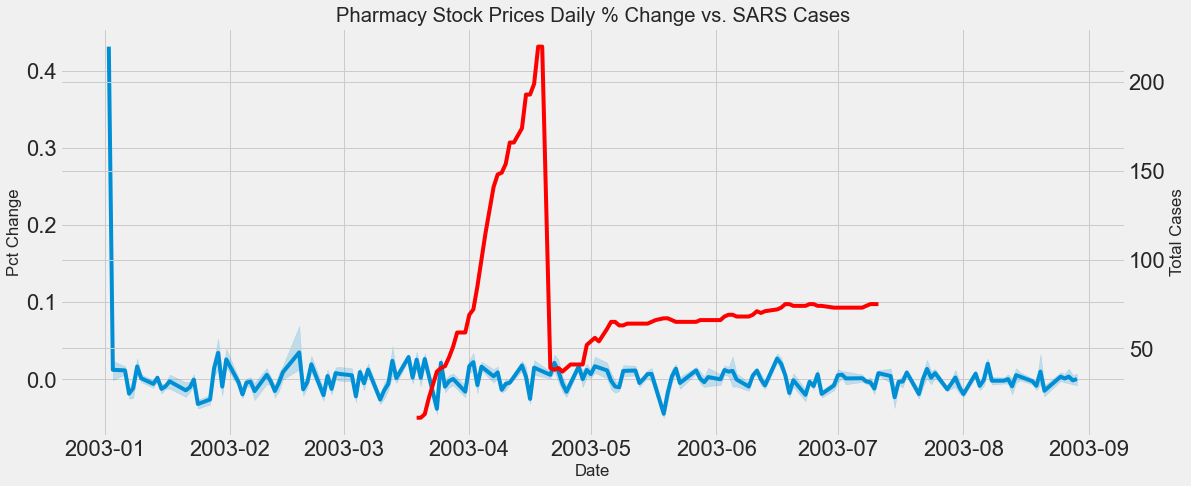

In [4]:
# Percent change of pharma companies stocks plotted with total SARS cases
ax = sns.lineplot(data = sarsPharmStocks, x = 'Date', y = 'Pct Change', )
sns.lineplot(data = sars_data, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Pharmacy Stock Prices Daily % Change vs. SARS Cases')

From the graph, we can see that despite the spike in SARS cases the percent change of pharmaceutical companies stocks remains fairly consistent. This might indicate that the SARS pandemic did not have much effect on the pharmaceutical companies.

#####  General companies (DOW JONES index) stock prices compared to SARS pandemic.

Text(0.5, 1.0, 'Dow Jones Stock Prices vs. SARS cases')

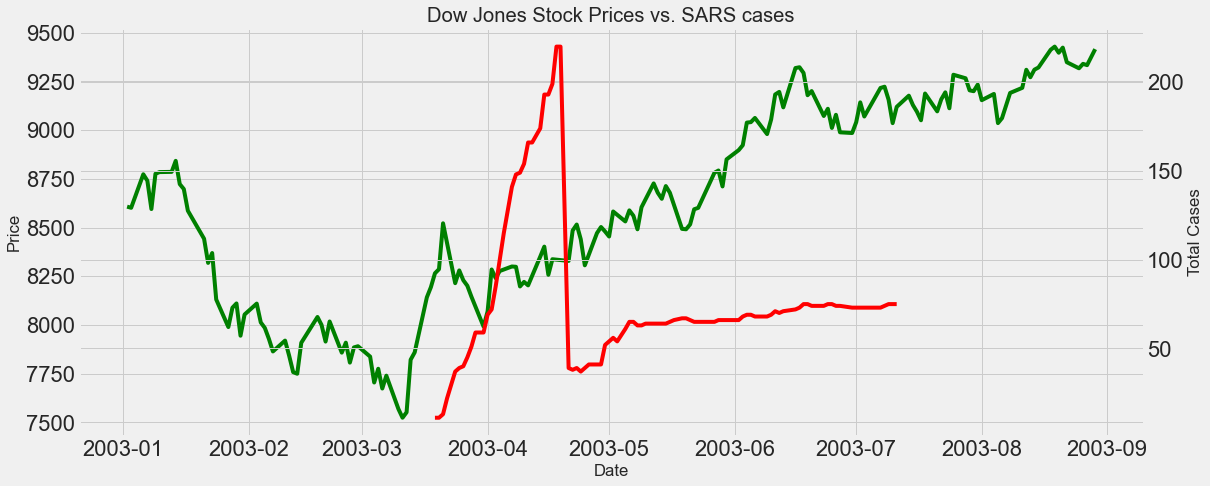

In [5]:
# general trend of Dow Jones prices plotted with SARS cases
ax = sns.lineplot(data = sarsDJI, x = 'Date', y = 'Price', color = 'green')
sns.lineplot(data = sars_data, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Dow Jones Stock Prices vs. SARS cases')

When comparing the SARS cases to the Dow Jones stock prices, we can see that right before the pandemic there was a drop in the stock prices and as the cases went up so did the stock prices for DOW. Because the SARS cases should have continued to increase (due to possible inaccuracies in our dataset), we will ignore the sharp drop.  

Text(0.5, 1.0, 'Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. SARS Cases')

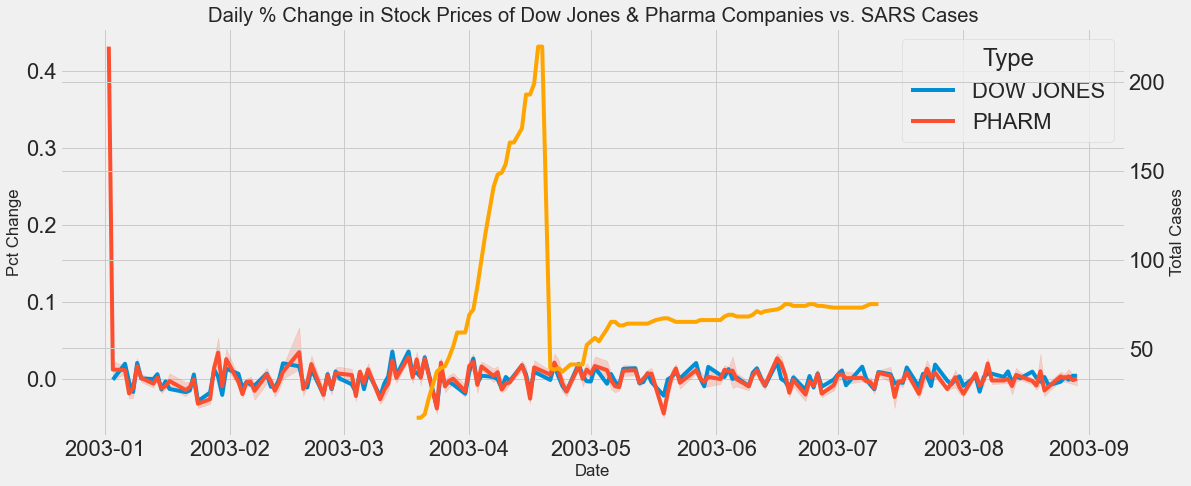

In [6]:
# plot general trend of % change in Dow Jones prices in relation to % change in Pharmacy stocks prices and SARS cases
sarsPharmStocks['Type'] = 'PHARM'
sarsDJI['Type'] = 'DOW JONES'
frames = [sarsDJI, sarsPharmStocks]
stocksSars = pd.concat(frames)
ax = sns.lineplot(data=stocksSars, x="Date", y="Pct Change", hue='Type')
sns.lineplot(data = sars_data, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color='orange').set_title('Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. SARS Cases')

This graph compares the percent change in stock prices of Dow Jones and pharma companies with the total number of SARS cases over time. It can be seen that the percent change of Dow Jones and pharma companies do not have much change over time. As a result, there may be no correlation between percent change in stock prices and SARS cases. 

### Analysis

Just looking at the SARS trend, we can see that the total number of cases increased from March 2003 to April 2003. However, there is a sharp decline from April to May which may be due to an issue with the dataset that we chose. Aside from this sudden decline, it doesn’t seem like the SARS pandemic has any correlation to the adjusted closing price for the top 10 pharmaceutical companies, as the trend for our closing prices are quite steady throughout the date range a month before and a month after the SARS pandemic. 

### Carrying out EDA for H1N1 and stock prices relationship

(note keep in mind the H1N1 pandemic took place right after the 2008 housing market crash)

##### Pharmaceutical Company stock prices compared to SARS pandemic

Text(0.5, 1.0, 'Pharmacy stock Prices vs. H1N1 Cases')

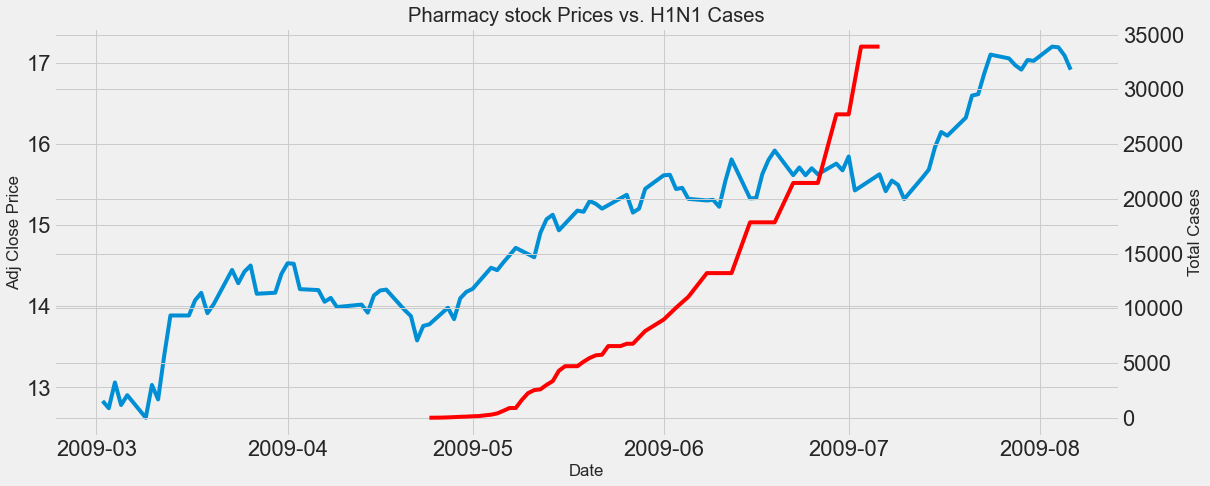

In [7]:
# Price of pharma companies stocks plotted with total h1n1 cases
numberOfCompanies = 10
h1n1PharmStocksSum = h1n1PharmStocks.groupby(['Date']).sum('Adj Close Price')/numberOfCompanies
ax = sns.lineplot(data = h1n1PharmStocksSum, x = 'Date', y = 'Adj Close Price')
sns.lineplot(data = h1n1US, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Pharmacy stock Prices vs. H1N1 Cases')

The prices of stock in pharmaceutical companies ended up rising, but this might be due to the fact that we were coming out of the 2008 economic crisis, so it had no choice but to rise. Also maybe pharma companies profit more during pandemics.

Text(0.5, 1.0, 'Pharmacy stock Prices Daily % change vs. H1N1 Cases')

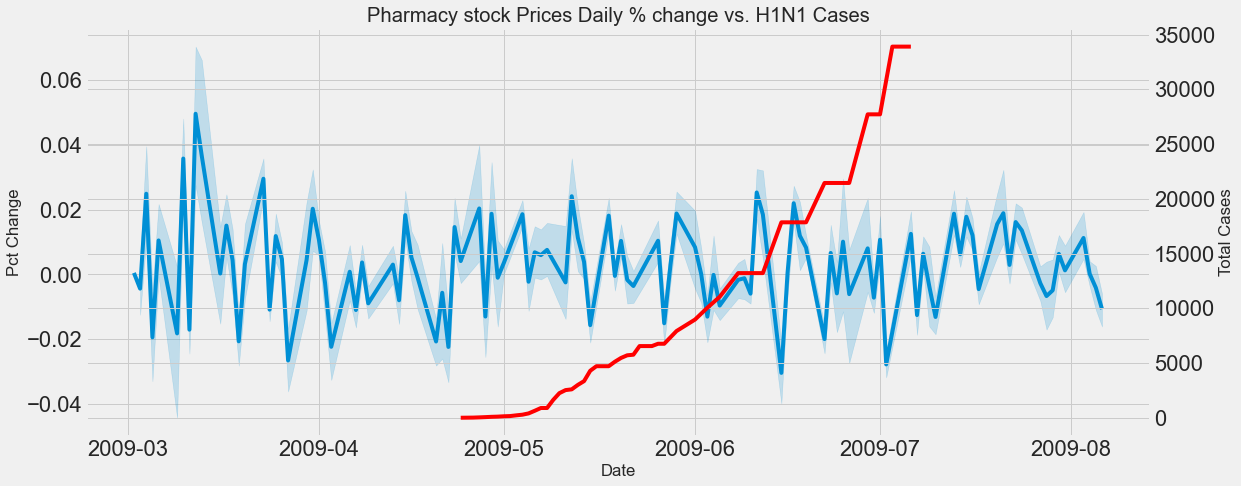

In [8]:
# Percent change of pharma companies stocks plotted with total h1n1 cases
ax = sns.lineplot(data = h1n1PharmStocks, x = 'Date', y = 'Pct Change', )
sns.lineplot(data = h1n1US, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Pharmacy stock Prices Daily % change vs. H1N1 Cases')

Plotting the percent change in daily stock prices highlights how volatile the stock market was during this time. However, this was the case for a large portion of the year even before the pandemic. The stock market of pharmaceutical companies look much more volatile after 2008-2009 compared to 2007-2008. The pandemic may have played a smaller role in this volatility.

#####  General companies (DOW JONES index) stock prices compared to SARS pandemic.

Text(0.5, 1.0, 'Dow Jones Stock Prices vs. H1N1 cases')

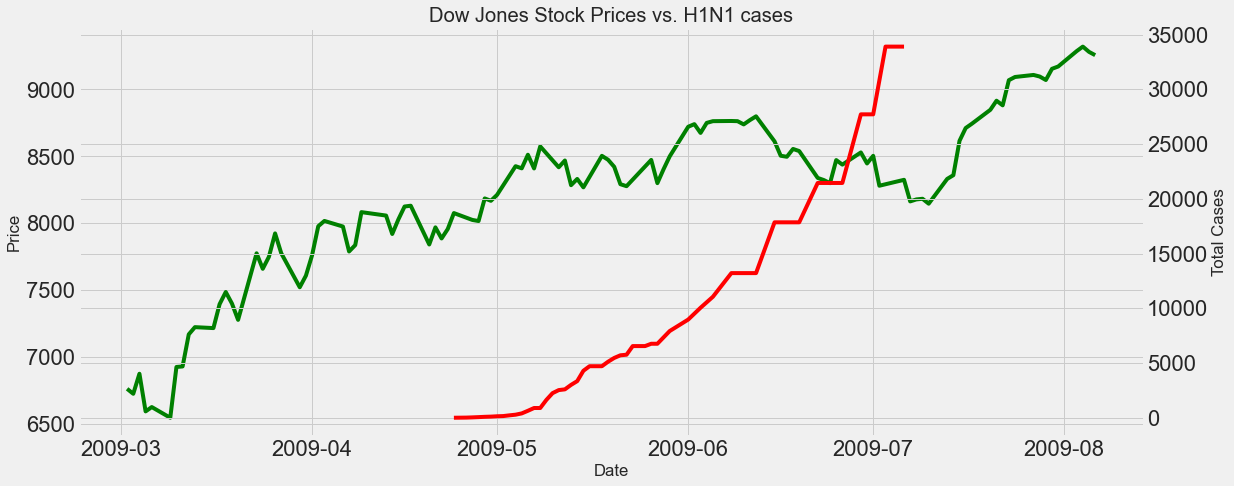

In [9]:
# general trend of Dow Jones prices plotted with h1n1 cases
ax = sns.lineplot(data = h1n1DJI, x = 'Date', y = 'Price', color = 'green')
sns.lineplot(data = h1n1US, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Dow Jones Stock Prices vs. H1N1 cases')

We can see the Dow Jones index stocks rise much more steadily than the pharmaceutical companies stocks. However, one major difference is that towards the peak of the H1N1 virus the Dow Jones index companies took a dip in prices. This may be due to the pandemic as the time frames line up, but we can not come to any conclusive conclusion yet.

Text(0.5, 1.0, 'Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. H1N1 Cases')

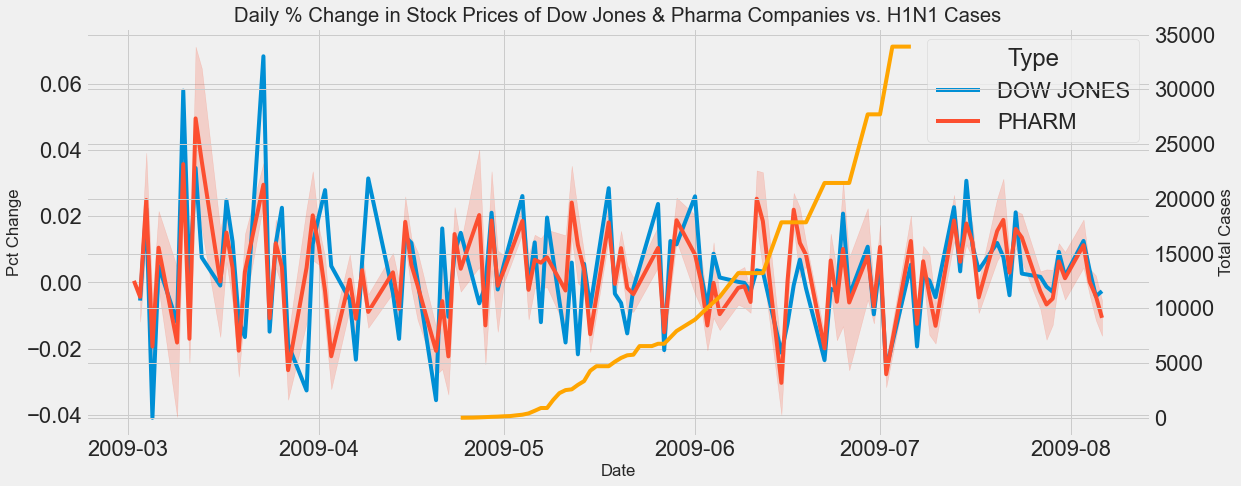

In [10]:
# plot general trend of % change in Dow Jones prices in relation to % change in Pharmacy stocks prices and h1n1
h1n1PharmStocks['Type'] = 'PHARM'
h1n1DJI['Type'] = 'DOW JONES'
frames = [h1n1DJI, h1n1PharmStocks]
stocks = pd.concat(frames)

ax = sns.lineplot(data=stocks, x="Date", y="Pct Change", hue='Type')
sns.lineplot(data = h1n1US, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color='orange').set_title('Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. H1N1 Cases')

Both types of companies' stocks seem very volatile even before the pandemic. It also seems that both types of stocks follow a similar trend. However, Dow Jones has bigger dips and spikes before the pandemic, while pharmaceutical companies become slightly more volatile during the rise of the pandemic. 

### Analysis

 The graph shows a positive correlation of H1N1 cases over time from May 2009 to July 2009. From May to June, it seems that the H1N1 cases increased along with the stock prices. However, while the number of H1N1 cases do continue to increase after July, the stock prices do not begin increasing until a month after. This increase in overall and pharmaceutical stock prices may be the aftermath of the H1N1 pandemic. 

Maybe: Although both the DOW JONES and pharmaceutical stocks both increased during and post pandemic, there’s slight differences in the patterns of their increase. When looking at the pharmaceutical stock prices there seems to be a dip right before the H1N1 pandemic hit and from there it increases as the H1N1 cases rise as well. However, DOW JONES seemed to have an increase in 03/2008 which before the pandemic and is just increasing as an overall trend which may or may not be SARS related.  

There is also the 2008 housing market crash to take into account as a factor for the dips in the stock market before the H1N1 pandemic. The rise may be due to a recovery from that market crash, rather than something related to the pandemic.

### Carrying out EDA for COVID and stock prices relationship

##### Pharmaceutical companies stock prices compared to trend of COVID cases

Text(0.5, 1.0, 'Pharmacy stock Prices vs. COVID Cases')

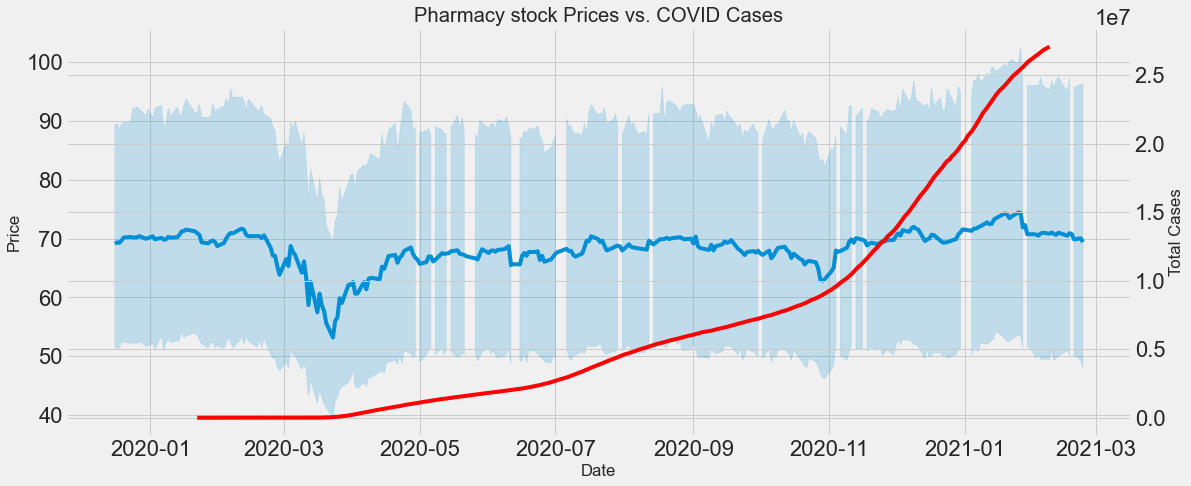

In [11]:
# Price of pharma companies stocks plotted with total covid cases
ax = sns.lineplot(data=covidPharmStocks, x="Date", y="Price")
sns.lineplot(data = covid, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color='red').set_title('Pharmacy stock Prices vs. COVID Cases')

This graph shows the stock prices of pharmaceutical companies remained fairly consistent, besides the dip at the start of the COVID crisis. It did not fluctate much, despite the number of covid cases spiking significantly.

In [ ]:
# Percent change of pharma companies stocks plotted with total covid cases
ax = sns.lineplot(data = covidPharmStocks, x = 'Date', y = 'Pct Change', )
sns.lineplot(data = covid, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Pharmacy stock Prices Daily % change vs. COVID Cases')

In this graph, we are comparing the percent change in stock prices with the total number of COVID cases. It can be seen that there is not much correlation in the percent change in stock prices with the COVID cases as the percent change graph fluctuates a little. 


In [ ]:
# General trend of Dow Jones prices plotted with covid cases
ax = sns.lineplot(data = covidDow, x = 'Date', y = 'Price', color = 'green')
sns.lineplot(data = covid, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color = 'red').set_title('Dow Jones Stock Prices vs. COVID cases')

Here, we are comparing the trend of stock prices and COVID cases over time. During the beginning of the pandemic, when cases start to rise, there is a big drop. It can be seen that there is a positive correlation between both the Dow Jones stock prices and total number of COVID cases over time. 

In [ ]:
# plot general trend of % change in Dow Jones prices in relation to % change in Pharmacy stocks prices and Covid
covidPharmStocks['Type'] = 'PHARM'
covidDow['Type'] = 'DOW JONES'
frames = [covidDow, covidPharmStocks]
stocks = pd.concat(frames)

ax = sns.lineplot(data=stocks, x="Date", y="Pct Change", hue='Type')
sns.lineplot(data = covid, x = 'Date', y = 'Total Cases', ax = ax.twinx(), color='orange').set_title('Daily % Change in Stock Prices of Dow Jones & Pharma Companies vs. COVID Cases')


Again, Dow Jones and pharmaceutical companies follow a similar trend in stock prices throughout the pandemic. Both were very volatile at the start of the pandemic, but quickly recovered and remained consistent despite the significant rise in COVID cases.

### Analysis

Looking at the COVID-19 trend, at the beginning of the pandemic, the stock prices began to rise along with the number of COVID-19 cases. However, as the COVID-19 cases continued to grow, the stock prices did not, but instead fluctuated slightly. For DOW JONES there is a crash toward the beginning of the pandemic (1/20), while for the pharmaceutical companies there is a dip that is less drastic than than DOW. Overall, when comparing these trends in relation to the COVID-19 cases, it seems like there’s no direct correlation as there are many fluctuations in the stock prices for both DOW and pharm. 

## Overall

Although for some of these pandemics there seems to be some sort of correlation to the stock market prices in regards to both DOW JONES and the pharmaceutical companies, we still do not know for sure if any of these trends can be attributed to the pandemics or if there were major events that may have caused such results. We will further analyze our data in order to find a conclusion to our research question.
